Queremos predecir el grado de inversión, por lo que usaremos algoritmos de clasificación

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel("/content/drive/My Drive/RatingEmisores.xlsx")
df

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd,Rating,Class
0,-0.081687,-0.751091,-0.202746,-0.131826,-0.536445,-0.112096,-0.898965,-0.306049,0.078073,-0.550047,...,-0.731254,-0.219100,-0.423802,-0.927197,6.735399,-0.045263,0.201553,1,Aaa,1
1,-0.081742,0.028295,-0.037882,0.047769,-0.147139,-0.112143,-0.898920,-0.305960,0.077890,-0.550044,...,-0.731196,-0.219100,-0.423798,-0.190848,-0.155363,-0.045263,0.201553,1,Aaa,1
2,-0.039262,0.032554,-0.031806,0.007762,-0.426239,0.148500,0.160112,0.233812,-0.057957,-0.113300,...,-0.048552,-0.164342,0.061084,-0.419878,0.905111,-0.429746,-0.402716,1,Aa2,2
3,-0.019830,0.030382,0.007053,0.027423,0.331448,0.095906,0.077182,0.146516,-0.041773,0.585903,...,-0.141359,0.550594,0.022772,0.345912,-0.289434,0.351055,0.430469,1,Aa2,2
4,0.001359,0.050442,0.095141,0.093653,0.569734,0.249968,0.258331,0.155618,0.549806,0.058409,...,0.653871,-0.025491,0.086071,0.598639,-0.260878,0.571013,0.709596,1,Aa2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,-0.099327,-0.010702,-0.127046,-0.030785,-4.349569,0.124830,0.146400,0.008407,0.364676,-0.028333,...,0.603271,-0.150779,0.144187,-4.408257,-1.339781,-4.271318,-5.168673,0,Caa1,16
1696,-0.116919,-0.009799,-0.155183,-0.043333,-2.937747,0.157873,0.066243,0.084104,0.309846,0.808505,...,0.007110,0.604043,0.127468,-2.977064,-1.695900,-2.868086,-3.429429,0,Caa1,16
1697,-0.099676,0.067595,-0.170022,-0.078134,-1.960264,0.023226,-0.201398,0.024856,0.020078,1.352542,...,-0.959809,1.227363,0.056198,-1.955285,-1.919739,-1.876336,-1.940995,0,Caa1,16
1698,-0.088853,0.007820,-0.122645,-0.037088,-2.066509,0.067495,-0.011377,0.289219,-0.171802,0.671224,...,-0.438389,0.865331,-0.104059,-2.059347,-1.462429,-2.027254,-2.059961,0,Caa1,16


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Para ver lo que hay en la memoria tipo R
%whos

Variable                     Type         Data/Info
---------------------------------------------------
DecisionTreeClassifier       ABCMeta      <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
GradientBoostingClassifier   ABCMeta      <class 'sklearn.ensemble.<...>dientBoostingClassifier'>
KNeighborsClassifier         ABCMeta      <class 'sklearn.neighbors<...>on.KNeighborsClassifier'>
LogisticRegression           type         <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
RandomForestClassifier       ABCMeta      <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
df                           DataFrame          Sales/Revenues  Gro<...>n[1700 rows x 29 columns]
drive                        module       <module 'google.colab.dri<...>s/google/colab/drive.py'>
np                           module       <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
pd                           module       <module 'pandas' from '/u<...>ages/pandas/__init__.py'>
plt           

In [ ]:
# Tenemos 1700 emisores de deuda tanto públicos como privados
# Cada emisor de deuda tiene ciertos parámetros (ratios financieros, etc)
# Usaremos estos para predecir el grado de inversión
# 1: Tiene grado de inversión
# 0: No tiene

# De Baa3, BBB-, BBB- para arriba sí tiene grado de inversión
# De Ba1, BB+, BB+ para abajo son bonos basura o high yield
df["InvGrd"]

0       1
1       1
2       1
3       1
4       1
       ..
1695    0
1696    0
1697    0
1698    0
1699    0
Name: InvGrd, Length: 1700, dtype: int64

In [ ]:
df.shape

(1700, 29)

In [ ]:
df.describe()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd,Class
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,0.050378,0.026007,0.068718,0.021074,0.123026,0.822405,-0.419810,1.255168,3.142797,0.466620,...,0.298785,-0.855714,0.436002,0.072802,0.032196,0.497705,0.019394,-0.217604,0.757059,7.744706
std,0.161910,0.273768,0.237365,0.189025,14.475689,13.317075,28.385702,16.224453,51.986550,1.859494,...,5.265291,22.926862,1.904282,0.266471,6.151994,12.102502,14.594193,15.389000,0.428986,3.373127
min,-0.661715,-0.794722,-0.782254,-0.805153,-289.000000,-0.903014,-493.305578,-0.921515,-0.997692,-0.990982,...,-0.991976,-502.000000,-0.994141,-0.684678,-96.250000,-59.795133,-305.462167,-373.837267,0.000000,1.000000
25%,-0.005693,-0.020028,-0.022640,-0.042771,-0.158478,-0.076316,-0.120725,-0.094767,-0.337959,-0.195117,...,-0.096996,-0.857013,-0.227327,-0.072734,-0.152894,-0.293521,-0.208483,-0.233955,1.000000,5.000000
50%,0.034000,0.003403,0.049482,0.011134,0.056627,0.005886,-0.003060,-0.002078,0.043092,0.075820,...,0.043216,-0.229098,0.040446,0.041785,0.066027,-0.040405,-0.009403,-0.020392,1.000000,8.000000
75%,0.083004,0.025595,0.124533,0.060566,0.222219,0.136449,0.160251,0.174735,0.649475,0.483113,...,0.177340,0.512778,0.416067,0.161215,0.236046,0.168897,0.156136,0.201596,1.000000,9.000000
max,2.277229,3.202713,3.542425,4.141182,478.280075,281.604237,865.194595,289.388178,2038.000000,36.980037,...,182.131887,280.138728,34.372455,4.194381,187.000000,381.243282,474.847172,343.145356,1.000000,16.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sales/Revenues            1700 non-null   float64
 1   Gross Margin              1700 non-null   float64
 2   EBITDA                    1700 non-null   float64
 3   EBITDA Margin             1700 non-null   float64
 4   Net Income Before Extras  1700 non-null   float64
 5   Total Debt                1700 non-null   float64
 6   Net Debt                  1700 non-null   float64
 7   LT Debt                   1700 non-null   float64
 8   ST Debt                   1700 non-null   float64
 9   Cash                      1700 non-null   float64
 10  Free Cash Flow            1700 non-null   float64
 11  Total Debt/EBITDA         1700 non-null   float64
 12  Net Debt/EBITDA           1700 non-null   float64
 13  Total MV                  1700 non-null   float64
 14  Total De

In [ ]:
df["Rating"].value_counts()

Baa2    326
Baa3    232
Baa1    179
Aa3     174
A2      156
Ba2     125
A1      122
Ba3     108
B1       69
Aa2      65
B2       48
B3       37
A3       31
Ba1      17
Caa1      9
Aaa       2
Name: Rating, dtype: int64

In [ ]:
df.Class.value_counts()

8     326
9     232
7     179
3     174
5     156
11    125
4     122
12    108
13     69
2      65
14     48
15     37
6      31
10     17
16      9
1       2
Name: Class, dtype: int64

In [ ]:
# Verificamos si hay missing data
# Is null summary
df.isnull().sum()

Sales/Revenues              0
Gross Margin                0
EBITDA                      0
EBITDA Margin               0
Net Income Before Extras    0
Total Debt                  0
Net Debt                    0
LT Debt                     0
ST Debt                     0
Cash                        0
Free Cash Flow              0
Total Debt/EBITDA           0
Net Debt/EBITDA             0
Total MV                    0
Total Debt/MV               0
Net Debt/MV                 0
CFO/Debt                    0
CFO                         0
Interest Coverage           0
Total Liquidity             0
Current Liquidity           0
Current Liabilities         0
EPS Before Extras           0
PE                          0
ROA                         0
ROE                         0
InvGrd                      0
Rating                      0
Class                       0
dtype: int64

In [ ]:
df.InvGrd.value_counts()
# La mayoria tiene grado de inversión

1    1287
0     413
Name: InvGrd, dtype: int64

In [ ]:
# df.shape[0] = 1700
df.InvGrd.value_counts()/df.shape[0]
# Cuidado si el target tiene < 25% (desbalance de la variable a predecir)

1    0.757059
0    0.242941
Name: InvGrd, dtype: float64

In [ ]:
# Existe desbalanceo: hay una clase minoritaria y otra mayoritaria

In [ ]:
pd.crosstab(df.InvGrd, df.Rating)

Rating,A1,A2,A3,Aa2,Aa3,Aaa,B1,B2,B3,Ba1,Ba2,Ba3,Baa1,Baa2,Baa3,Caa1
InvGrd,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,69,48,37,17,125,108,0,0,0,9
1,122,156,31,65,174,2,0,0,0,0,0,0,179,326,232,0


In [ ]:
# Queremos un modelo que nos prediga el grado de inversión de un
# emisor por sus ratios financieros


In [ ]:
df.groupby("InvGrd")["Sales/Revenues"].median()

InvGrd
0    0.044491
1    0.033169
Name: Sales/Revenues, dtype: float64

In [ ]:
df.groupby("InvGrd")["CFO"].median()

InvGrd
0    0.047938
1    0.046521
Name: CFO, dtype: float64

In [ ]:
# Buscamos relaciones entre algunas variables explicativas con la
# variable a explicar
df.groupby("InvGrd")["ROE"].median()

InvGrd
0   -0.127618
1   -0.005069
Name: ROE, dtype: float64

In [ ]:
df.groupby("InvGrd")["Free Cash Flow"].median()

InvGrd
0   -0.186639
1   -0.029383
Name: Free Cash Flow, dtype: float64

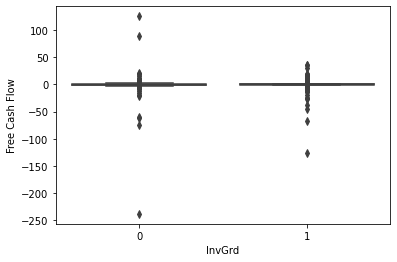

In [ ]:
sns.boxplot(x="InvGrd", y="Free Cash Flow", data=df)
plt.show()
# Volatilidad del FCF para los que tienen grado de inversión y los que no

In [ ]:
# Seleccionamos las variables del modelo
# No se utilizarán Rating ni Class para predecir el InvGrd
cols = list(df.columns)
cols.remove("Rating")
cols.remove("Class")
cols

['Sales/Revenues',
 'Gross Margin',
 'EBITDA',
 'EBITDA Margin',
 'Net Income Before Extras',
 'Total Debt',
 'Net Debt',
 'LT Debt',
 'ST Debt',
 'Cash',
 'Free Cash Flow',
 'Total Debt/EBITDA',
 'Net Debt/EBITDA',
 'Total MV',
 'Total Debt/MV',
 'Net Debt/MV',
 'CFO/Debt',
 'CFO',
 'Interest Coverage',
 'Total Liquidity',
 'Current Liquidity',
 'Current Liabilities',
 'EPS Before Extras',
 'PE',
 'ROA',
 'ROE',
 'InvGrd']

In [ ]:
# Creamos una copia del dataframe = df_tot
df_tot = df[cols].copy()

In [ ]:
# Separamos el dataframe entre las variables x y la y
x = df_tot.iloc[:, 0:-1]
y = df_tot["InvGrd"]
x

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,CFO/Debt,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE
0,-0.081687,-0.751091,-0.202746,-0.131826,-0.536445,-0.112096,-0.898965,-0.306049,0.078073,-0.550047,...,0.230612,0.092666,-0.226654,-0.731254,-0.219100,-0.423802,-0.927197,6.735399,-0.045263,0.201553
1,-0.081742,0.028295,-0.037882,0.047769,-0.147139,-0.112143,-0.898920,-0.305960,0.077890,-0.550044,...,0.230678,0.092666,-0.066735,-0.731196,-0.219100,-0.423798,-0.190848,-0.155363,-0.045263,0.201553
2,-0.039262,0.032554,-0.031806,0.007762,-0.426239,0.148500,0.160112,0.233812,-0.057957,-0.113300,...,0.004367,0.153515,-0.162744,-0.048552,-0.164342,0.061084,-0.419878,0.905111,-0.429746,-0.402716
3,-0.019830,0.030382,0.007053,0.027423,0.331448,0.095906,0.077182,0.146516,-0.041773,0.585903,...,0.291792,0.415683,-0.132723,-0.141359,0.550594,0.022772,0.345912,-0.289434,0.351055,0.430469
4,0.001359,0.050442,0.095141,0.093653,0.569734,0.249968,0.258331,0.155618,0.549806,0.058409,...,0.070568,0.338177,-0.063855,0.653871,-0.025491,0.086071,0.598639,-0.260878,0.571013,0.709596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,-0.099327,-0.010702,-0.127046,-0.030785,-4.349569,0.124830,0.146400,0.008407,0.364676,-0.028333,...,0.348290,0.516587,-0.190974,0.603271,-0.150779,0.144187,-4.408257,-1.339781,-4.271318,-5.168673
1696,-0.116919,-0.009799,-0.155183,-0.043333,-2.937747,0.157873,0.066243,0.084104,0.309846,0.808505,...,1.453531,1.840865,-0.246259,0.007110,0.604043,0.127468,-2.977064,-1.695900,-2.868086,-3.429429
1697,-0.099676,0.067595,-0.170022,-0.078134,-1.960264,0.023226,-0.201398,0.024856,0.020078,1.352542,...,-2.785428,-2.826901,-0.266848,-0.959809,1.227363,0.056198,-1.955285,-1.919739,-1.876336,-1.940995
1698,-0.088853,0.007820,-0.122645,-0.037088,-2.066509,0.067495,-0.011377,0.289219,-0.171802,0.671224,...,-0.584309,-0.556247,-0.226685,-0.438389,0.865331,-0.104059,-2.059347,-1.462429,-2.027254,-2.059961


In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1695    0
1696    0
1697    0
1698    0
1699    0
Name: InvGrd, Length: 1700, dtype: int64

In [ ]:
# Dividimos los 1700 datos que tenemos de cada uno en
# data de entrenamiento y de testeo

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123, stratify=y)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(1700, 26) (1360, 26) (340, 26)


In [ ]:
# Transformamos los datos

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [ ]:
# Hacemos una estandarizacion de los datos
# Resta el valor con el promedio de este y lo divide entre
# la desviación estándar
# Algunos algoritmos trabajan con estas transformaciones
# como los kNN, redes neuronales, SVM, etc.
# Por cómo funcionan los algoritmos se necesita la transformación
# por tasa de aprendizaje, etc

# Las transformaciones no afectan a las decisiones que se
# toman por descision tree, random fores, logistic y gradient
# boosting

sc = StandardScaler()
sc.fit(x_train)

x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
x_train_std

array([[-0.05520553,  0.00907299,  0.03664909, ..., -0.04996165,
        -0.01424652,  0.01170358],
       [-0.43004569,  5.03866679,  0.13187471, ..., -0.09587981,
         0.32079152,  0.11755047],
       [-1.10781979,  0.42751945, -0.03240987, ..., -0.19799629,
        -0.45572442, -0.18190524],
       ...,
       [-0.21587426, -0.04881506,  0.21885245, ..., -0.05278488,
         0.01865108,  0.06280246],
       [-0.73129894, -0.56246564, -0.2244057 , ..., -0.07271889,
        -0.00701948,  0.0195456 ],
       [-0.46217957, -0.06988256, -0.05422203, ..., -0.06139093,
         0.16860073,  0.08896701]])

In [ ]:
rfc = RandomForestClassifier(criterion="gini", n_estimators=100,
                             random_state=123, n_jobs=2)
rfc.fit(x_train_std, y_train)

RandomForestClassifier(n_jobs=2, random_state=123)

In [ ]:
importances = pd.DataFrame(data={
    "Variable" : x_train.columns,
    "Importancia" : rfc.feature_importances_
})

In [ ]:
importances = importances.sort_values(by="Importancia", ascending=False)
importances


,Variable,Importancia
10,Free Cash Flow,0.072486
17,CFO,0.059170
13,Total MV,0.050032
24,ROA,0.047722
1,Gross Margin,0.046373
16,CFO/Debt,0.046237
25,ROE,0.044735
2,EBITDA,0.044038
20,Current Liquidity,0.042672
4,Net Income Before Extras,0.041336


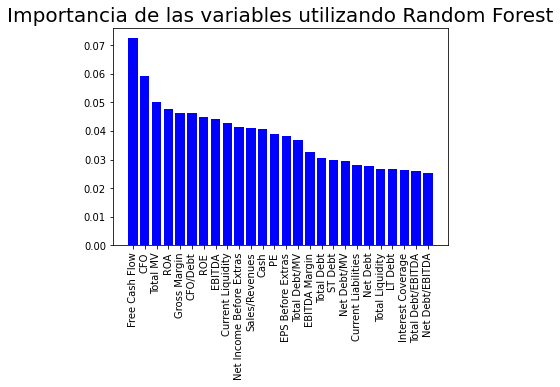

In [ ]:
plt.bar(x=importances["Variable"], height=importances["Importancia"], color ="Blue")
plt.title("Importancia de las variables utilizando Random Forest", size=20)
plt.xticks(rotation="vertical")
plt.show()


In [ ]:
# La data está "encriptada"
# Pero cuando no está "encriptada" se tiene que encriptar con
# uno de estos 3

# class_weight="balanced" sirve para arreglar el problema de
# desbalanceo que vimos antes

In [ ]:
lr = LogisticRegression(random_state=123, n_jobs=-1, penalty="none",
                        fit_intercept=True, class_weight="balanced")
lr.fit(x_train_std, y_train)
lr.score(x_train_std, y_train)

0.7169117647058824

In [ ]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=123,
                            min_samples_leaf=.01, class_weight="balanced")
dt.fit(x_train_std, y_train)
dt.score(x_train_std, y_train)

0.7044117647058824

In [ ]:
knn = KNeighborsClassifier(weights="distance")
knn.fit(x_train_std, y_train)
knn.score(x_train_std, y_train)


1.0

In [ ]:
rf = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=123,
                            class_weight="balanced")
rf.fit(x_train_std, y_train)
rf.score(x_train_std, y_train)

0.8801470588235294

In [ ]:
xg = GradientBoostingClassifier(n_estimators=500, random_state=123)
xg.fit(x_train_std, y_train)
xg.score(x_train_std, y_train)

1.0

In [ ]:
# Utilizamos los modelos ya entrenados (objetos dt, lr, etc)
# para hacer predicciones sobre la data de test


In [ ]:
df_train_pred_lr = pd.DataFrame({"actual": y_train,
                                 "predicted": lr.predict(x_train_std),
                                 "Non_Target": lr.predict_proba(x_train_std)[:,0],
                                 "Target": lr.predict_proba(x_train_std)[:,1]})
print("")

In [ ]:
df_train_pred_dt = pd.DataFrame({"actual": y_train,
                                 "predicted": dt.predict(x_train_std),
                                 "Non_Target": dt.predict_proba(x_train_std)[:, 0],
                                 "Target": dt.predict_proba(x_train_std)[:, 1]})
df_train_pred_dt

,actual,predicted,Non_Target,Target
39,1,1,0.227795,0.772205
554,1,1,0.227795,0.772205
933,1,0,0.622984,0.377016
310,1,1,0.227795,0.772205
1639,0,1,0.227795,0.772205
...,...,...,...,...
944,1,0,0.690985,0.309015
218,1,0,0.622984,0.377016
69,1,1,0.227795,0.772205
25,1,1,0.227795,0.772205


In [ ]:
df_train_pred_rf = pd.DataFrame({"actual": y_train,
                                 "predicted": rf.predict(x_train_std),
                                 "Non_Target": rf.predict_proba(x_train_std)[:, 0],
                                 "Target": rf.predict_proba(x_train_std)[:, 1]})
df_train_pred_rf

,actual,predicted,Non_Target,Target
39,1,1,0.201561,0.798439
554,1,1,0.410175,0.589825
933,1,1,0.410246,0.589754
310,1,1,0.231317,0.768683
1639,0,1,0.234306,0.765694
...,...,...,...,...
944,1,1,0.447521,0.552479
218,1,1,0.404603,0.595397
69,1,1,0.182500,0.817500
25,1,1,0.209523,0.790477


In [ ]:
df_train_pred_knn = pd.DataFrame({"actual": y_train,
                                 "predicted": knn.predict(x_train_std),
                                 "Non_Target": knn.predict_proba(x_train_std)[:, 0],
                                 "Target": knn.predict_proba(x_train_std)[:, 1]})
df_train_pred_knn

,actual,predicted,Non_Target,Target
39,1,1,0.0,1.0
554,1,1,0.0,1.0
933,1,1,0.0,1.0
310,1,1,0.0,1.0
1639,0,0,1.0,0.0
...,...,...,...,...
944,1,1,0.0,1.0
218,1,1,0.0,1.0
69,1,1,0.0,1.0
25,1,1,0.0,1.0


In [ ]:
df_train_pred_xg = pd.DataFrame({"actual": y_train,
                                 "predicted": xg.predict(x_train_std),
                                 "Non_Target": xg.predict_proba(x_train_std)[:, 0],
                                 "Target": xg.predict_proba(x_train_std)[:, 1]})
df_train_pred_xg

,actual,predicted,Non_Target,Target
39,1,1,0.004521,0.995479
554,1,1,0.035958,0.964042
933,1,1,0.033175,0.966825
310,1,1,0.009362,0.990638
1639,0,0,0.839990,0.160010
...,...,...,...,...
944,1,1,0.034895,0.965105
218,1,1,0.062407,0.937593
69,1,1,0.007766,0.992234
25,1,1,0.012433,0.987567


In [ ]:
df_test_pred_lr = pd.DataFrame({"actual": y_test,
                                 "predicted": lr.predict(x_test_std),
                                 "Non_Target": lr.predict_proba(x_test_std)[:, 0],
                                 "Target": lr.predict_proba(x_test_std)[:, 1]})
df_test_pred_lr

,actual,predicted,Non_Target,Target
1204,1,1,0.399870,0.600130
648,1,1,0.247200,0.752800
864,1,0,0.593519,0.406481
709,1,1,0.449832,0.550168
1355,0,0,0.790132,0.209868
...,...,...,...,...
1148,1,1,0.496045,0.503955
447,1,1,0.471504,0.528496
1357,0,0,0.586001,0.413999
1326,0,1,0.404996,0.595004


In [ ]:
df_test_pred_dt = pd.DataFrame({"actual": y_test,
                                 "predicted": dt.predict(x_test_std),
                                 "Non_Target": dt.predict_proba(x_test_std)[:, 0],
                                 "Target": dt.predict_proba(x_test_std)[:, 1]})
df_test_pred_dt

,actual,predicted,Non_Target,Target
1204,1,1,0.227795,0.772205
648,1,1,0.227795,0.772205
864,1,1,0.227795,0.772205
709,1,1,0.227795,0.772205
1355,0,0,0.690985,0.309015
...,...,...,...,...
1148,1,1,0.227795,0.772205
447,1,1,0.227795,0.772205
1357,0,0,0.622984,0.377016
1326,0,0,0.900513,0.099487


In [ ]:
df_test_pred_rf = pd.DataFrame({"actual": y_test,
                                 "predicted": rf.predict(x_test_std),
                                 "Non_Target": rf.predict_proba(x_test_std)[:, 0],
                                 "Target": rf.predict_proba(x_test_std)[:, 1]})
df_test_pred_rf

,actual,predicted,Non_Target,Target
1204,1,1,0.235585,0.764415
648,1,1,0.388050,0.611950
864,1,1,0.422367,0.577633
709,1,1,0.283660,0.716340
1355,0,0,0.576884,0.423116
...,...,...,...,...
1148,1,1,0.294680,0.705320
447,1,1,0.196390,0.803610
1357,0,0,0.708268,0.291732
1326,0,0,0.658185,0.341815


In [ ]:
df_test_pred_knn = pd.DataFrame({"actual": y_test,
                                 "predicted": knn.predict(x_test_std),
                                 "Non_Target": knn.predict_proba(x_test_std)[:, 0],
                                 "Target": knn.predict_proba(x_test_std)[:, 1]})
df_test_pred_knn

,actual,predicted,Non_Target,Target
1204,1,1,0.185583,0.814417
648,1,1,0.000000,1.000000
864,1,0,0.502308,0.497692
709,1,1,0.000000,1.000000
1355,0,1,0.223467,0.776533
...,...,...,...,...
1148,1,1,0.000000,1.000000
447,1,1,0.000000,1.000000
1357,0,1,0.397317,0.602683
1326,0,0,0.824846,0.175154


In [ ]:
df_test_pred_xg = pd.DataFrame({"actual": y_test,
                                 "predicted": xg.predict(x_test_std),
                                 "Non_Target": xg.predict_proba(x_test_std)[:, 0],
                                 "Target": xg.predict_proba(x_test_std)[:, 1]})
df_test_pred_xg

,actual,predicted,Non_Target,Target
1204,1,1,0.012640,0.987360
648,1,0,0.552273,0.447727
864,1,1,0.199837,0.800163
709,1,1,0.004108,0.995892
1355,0,0,0.775395,0.224605
...,...,...,...,...
1148,1,1,0.028255,0.971745
447,1,1,0.019723,0.980277
1357,0,0,0.989460,0.010540
1326,0,0,0.756016,0.243984


In [ ]:
# Actual = valor real
# Predicted = Valor predicho por el modelo
# Non_Target = probabilidad de no ser grado de inversión
# Target = probabilidad de ser grado de inversión

# El modelo dice que va a ser 1 (tiene grado de inversión) o 0
# (no tiene grado e inversión) y comparamos estos valores
# con los valores reales (datos históricos, antiguos, registrados, etc)

In [ ]:
# Calculamos métricas
# para ver si el modelo es bueno o no es bueno

# Matriz de confusión
# Cuando el valor real es negativo (0) y el valor predicho es positivo (1):
#  FALSO NEGATIVO (Error tipo II)
# Cuando el valor real es positivo (1) y el valor predicho es negativo (0):
#  FALSO POSITIVO  (Error tipo I)

In [ ]:
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


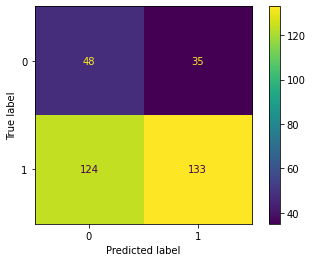

In [ ]:
plot_confusion_matrix(lr, x_test, y_test)
plt.show()
# La diagonal principal muestra los aciertos (verdaderos)


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
l_models = []
l_metric_train = []
l_metric_test = []
df_metrica = pd.DataFrame(columns=["Modelo", "Accuracy_Train", "Accuracy Test"])


In [ ]:
def metrica_modelo(nom_model, df_train, df_test, df_aux):
  df_metrica_f=df_aux.copy()
  l1 = nom_model
  l2 = accuracy_score(df_train.actual, df_train.predicted)
  l3 = accuracy_score(df_test.actual, df_test.predicted)
  x1 = (l1, l2, l3)
  df_temp = pd.DataFrame([x1], columns=["Modelo", "Accuracy_Train", "Accuracy Test"])
  df_metrica_f = pd.concat([df_metrica_f, df_temp])
  return df_metrica_f

In [ ]:
df_metrica = metrica_modelo("Logistic Regression", df_train_pred_lr, df_test_pred_lr, df_metrica)
df_metrica = metrica_modelo("Decision Tree", df_train_pred_dt, df_test_pred_dt, df_metrica)
df_metrica = metrica_modelo("Random Forest", df_train_pred_rf, df_test_pred_rf, df_metrica)
df_metrica = metrica_modelo("kN Neighbors", df_train_pred_knn, df_test_pred_knn, df_metrica)
df_metrica = metrica_modelo("Gradient Boosting", df_train_pred_xg, df_test_pred_xg, df_metrica)

In [ ]:
df_metrica


,Modelo,Accuracy_Train,Accuracy Test
0,Logistic Regression,0.716912,0.688235
0,Decision Tree,0.704412,0.676471
0,Random Forest,0.880147,0.794118
0,kN Neighbors,1.000000,0.805882
0,Gradient Boosting,1.000000,0.876471


In [ ]:
# Lo más importante es la data del accuracy test
# Porque estamos evaluando cómo se comporta el modelo nueva

# Los 3 últimos modelos tienen un problema de estabilidad
# porque la brecha entre los valores de precisión para los datos
# de entrenamiento de y de testeo es muy grande (9, 20 y 23%)
# Por lo tanto se descartan

# Entonces tenemos que hacer es una optimización de hiperparámetros
# para hacer que las brechas se reduzcan

# El modelo ganador es la regresión logística porque es el que tiene
# mayor precisión de los modelos que tienen más estabilidad